In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import datetime
import numpy as np
import pickle
import time
import seaborn as sns
from sys import platform
import os
import joblib

In [2]:
# This is the code you can use to open your pickle file
# Read the data and features from the pickle
final_data, discrete_features, continuous_features, ret_cols = pickle.load( open( "Data/clean_data.pickle", "rb" ) )

# removing LendingClub calculated features

In [3]:
# pandas drop columns using list of column names
final_data.drop(["grade", "int_rate"], axis=1)

,id,loan_amnt,funded_amnt,revol_util,revol_bal,fico_range_low,fico_range_high,pub_rec,open_acc,earliest_cr_line,...,annual_inc,home_ownership,emp_length,term,installment,verification_status,recoveries,loan_status,last_pymnt_d,total_pymnt
0,74121690,6000.0,6000.0,63.0,15055.0,675.0,679.0,0.0,16.0,2006-05-01,...,43000.0,MORTGAGE,9 years,36 months,202.14,Not Verified,0.00,Fully Paid,2019-04-01,7268.153165
2,74826201,7200.0,7200.0,18.4,9309.0,750.0,754.0,0.0,11.0,2001-12-01,...,49000.0,MORTGAGE,10+ years,36 months,216.83,Source Verified,0.00,Fully Paid,2016-04-01,7223.410000
3,75061311,12000.0,12000.0,50.6,12152.0,670.0,674.0,0.0,10.0,1999-12-01,...,49000.0,MORTGAGE,10+ years,60 months,266.88,Not Verified,443.49,Charged Off,2018-11-01,8448.900000
4,75091735,11425.0,11425.0,7.2,2096.0,730.0,734.0,0.0,11.0,2008-09-01,...,26000.0,RENT,5 years,36 months,421.87,Source Verified,0.00,Fully Paid,2017-11-01,14331.034913
6,75235366,20625.0,20625.0,63.6,10742.0,695.0,699.0,0.0,10.0,1990-05-01,...,52000.0,MORTGAGE,10+ years,36 months,672.80,Source Verified,0.00,Fully Paid,2018-09-01,24142.676489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762896,154225862,25525.0,25525.0,30.8,13484.0,710.0,714.0,0.0,23.0,2006-11-01,...,92000.0,RENT,2 years,36 months,948.61,Source Verified,0.00,Fully Paid,2019-07-01,25743.640001
1762965,154311563,6000.0,6000.0,83.4,18852.0,705.0,709.0,0.0,8.0,2001-12-01,...,120000.0,OWN,10+ years,36 months,222.99,Not Verified,0.00,Fully Paid,2019-10-01,6333.814970
1762976,153817414,12000.0,12000.0,15.7,1317.0,710.0,714.0,0.0,8.0,2006-12-01,...,65000.0,MORTGAGE,6 years,60 months,287.00,Not Verified,0.00,Fully Paid,2019-10-01,12520.400076
1763007,154053832,15000.0,15000.0,4.1,697.0,775.0,779.0,0.0,9.0,2006-12-01,...,42000.0,MORTGAGE,None,36 months,475.68,Not Verified,0.00,Fully Paid,2019-09-01,15287.033886


In [4]:
# Create the outcome
final_data["default"] = final_data.loan_status.isin(["Charged Off", "Default"])

In [5]:
# Create a feature for the length of a person's credit history at the
# time the loan is issued
final_data['cr_hist'] = (final_data.issue_d - final_data.earliest_cr_line) / np.timedelta64(1, 'M')
continuous_features.append('cr_hist')

In [6]:
from sklearn.preprocessing import MinMaxScaler

def minMaxScaleContinuous(continuousList):
    return pd.DataFrame(MinMaxScaler().fit_transform(final_data[continuousList])
                             ,columns=list(final_data[continuousList].columns)
                             ,index = final_data[continuousList].index)

def createDiscreteDummies(discreteList):
    return pd.get_dummies(final_data[discreteList], dummy_na = True, prefix_sep = "::", drop_first = False)



# save the model to disk
def saveModel(filename, model):
    joblib.dump(model, filename)
 
 
# load the model from disk
def loadModel(filename):
    return joblib.load(filename)

In [7]:
# define the discrete features you want to use in modeling.
# if you want to use all the discrete features, just set discrete_features_touse = discrete_features
discrete_features_touse =['purpose', 'term', 'verification_status', 'emp_length', 'home_ownership']

# define the continuous features to use in modeling
# if you want to use all the continuous features, just set the continuous_features_touse = continuous_features
continuous_features_touse = ['loan_amnt', 'funded_amnt','installment','annual_inc','dti','revol_bal','delinq_2yrs','open_acc',
 'pub_rec','fico_range_high','fico_range_low','revol_util','cr_hist']

In [8]:
#discrete_features_touse=discrete_features
#continuous_features_touse = continuous_features

# Split training and test data

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Create dummies for categorical features and concatenate with continuous features for X or predictor dataframe

# Use this line of code if you do not want to scale the continuous features
#X_continuous = data[continuous_features_touse]

# use this line if you want to scale the continuous features using the MinMaxScaler in the function defined above
X_continuous = minMaxScaleContinuous(continuous_features_touse)

# create numeric dummy features for the discrete features to be used in modeling
X_discrete = createDiscreteDummies(discrete_features_touse)

#concatenate the continuous and discrete features into one dataframe
X = pd.concat([X_continuous, X_discrete], axis = 1)

# this is the target variable 
target_col = 'default'
y=final_data[target_col]

# create a test and train split of the transformed data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.4)

print("Population:\n",y.value_counts())
print("Train:\n", y_train.value_counts())
print("Test:\n", y_test.value_counts())

Population:
 False    623662
True     164031
Name: default, dtype: int64
Train:
 False    373791
True      98824
Name: default, dtype: int64
Test:
 False    249871
True      65207
Name: default, dtype: int64


# Now use optimal features  from homework 2

# Part 1 – Support Vector Machines
# Now we will Build the model with best fit parameters using GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

''' These are just example parameter settings. You can change these parameters or add others.
    The grid search uses a scoring method of roc_auc. You can change that to another scoring method.
'''

parameters = {'C': [0.1,1.0],
              'max_iter': [100]
             }

print("Parameter grid:\n{}".format(parameters),'\n')

grid =  GridSearchCV(LinearSVC(), parameters, cv=10, return_train_score=True, scoring='roc_auc', n_jobs=-1)

# perform grid search cv on training data.  The CV algorithm divides this into training and validation
svc_model = grid.fit(X_train, y_train)

print('best params ',svc_model.best_params_,'\n')
print('best estimator ',svc_model.best_estimator_,'\n')
print('best validation score ', svc_model.best_score_,'\n')
print('scoring method ', svc_model.scorer_)

print("Test set accuracy score: {:.7f}".format(svc_model.score(X_test, y_test)))

#saveModel('svc_model', svc_model)

Parameter grid:
{'C': [0.1, 1.0], 'max_iter': [100]} 



C:\Users\coolr\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


best params  {'C': 0.1, 'max_iter': 100} 

best estimator  LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) 

best validation score  0.6918099457577502 

scoring method  make_scorer(roc_auc_score, needs_threshold=True)
Test set accuracy score: 0.6928138


# Prediction

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, fbeta_score, classification_report

'''Function to print model accuracy information'''

def printAccuracyInfo(model, X_test, y_test):
    print(y_test.value_counts())
    # Make predictions against the test set
    pred = svc_model.predict(X_test)
    # Show the confusion matrix
    ''' confusion matrix returned with Predicted as the Columns and Actual as the Rows
         PN  PP
         AN [tn  fp] 
         AP [fn  tp]
    '''
    # Show the confusion matrix
    print("confusion matrix:")
    print(confusion_matrix(y_test, pred))
    tn,fp,fn,tp=confusion_matrix(y_test, pred).ravel()
    print('tn: ',tn)
    print('fp: ',fp)
    print('fn: ',fn)
    print('tp: ',tp)

    # Find the accuracy scores of the predictions against the true classes
    print("accuracy: %0.3f" % accuracy_score(y_test, pred))
    print("recall: %0.3f" % recall_score(y_test, pred, pos_label=True))
    print("precision: %0.3f" % precision_score(y_test, pred, pos_label=True))
    print("f-measure: %0.3f" % fbeta_score(y_test, pred, beta=1, pos_label=True))
    print(classification_report(y_test,pred))

In [40]:
# example use of printAccuracyInfo using gbc_model and X_test
# note: if you trained model using rfecv_selected_train, you need to call the function with rfecv_selected_test for X_test
printAccuracyInfo(svc_model, X_test, y_test)

False    249871
True      65207
Name: default, dtype: int64
confusion matrix:
[[244474   5397]
 [ 59230   5977]]
tn:  244474
fp:  5397
fn:  59230
tp:  5977
accuracy: 0.795
recall: 0.092
precision: 0.525
f-measure: 0.156
              precision    recall  f1-score   support

       False       0.80      0.98      0.88    249871
        True       0.53      0.09      0.16     65207

    accuracy                           0.79    315078
   macro avg       0.67      0.54      0.52    315078
weighted avg       0.75      0.79      0.73    315078



In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

'''Function to print confusion matrix for a model
   You may need to run this to update to scikit-learn version 0.22.1
         !pip install -U scikit-learn --user
'''

def plotConfusionMatrix (negative_label, positive_label, model, X_test, y_test):
    titles_options = [("Confusion matrix, without normalization", None,'d'),
                      ("Normalized confusion matrix", 'true','.3g')]
    for title, normalize,val_frmt in titles_options:
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=[negative_label,positive_label],
                                     cmap=plt.cm.Blues,
                                     values_format=val_frmt,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        disp.ax_.set_xlabel('Predicted')
        disp.ax_.set_ylabel('Actual')

        print(title)
        print(disp.confusion_matrix)

    plt.show()

Confusion matrix, without normalization
[[244474   5397]
 [ 59230   5977]]
Normalized confusion matrix
[[0.97840085 0.02159915]
 [0.90833806 0.09166194]]


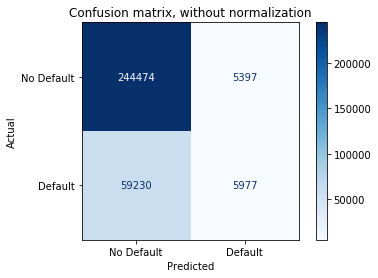

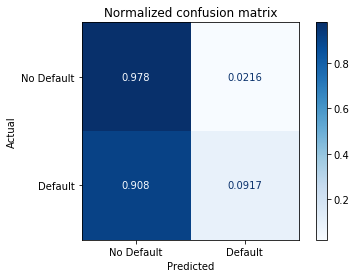

In [42]:
# example use of plotConfusionMatrix using gbc_model and X_test
# note: if you trained model using rfecv_selected_train, you need to call the function with rfecv_selected_test for X_test
plotConfusionMatrix('No Default', 'Default', svc_model, X_test, y_test)

# visualization of performance

In [43]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

def plotNewROCCurve(model,  X_test, y_test):
    disp = plot_roc_curve(model, X_test, y_test)
    disp.figure_.suptitle("ROC Curve")
    disp.ax_.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)
    plt.show()

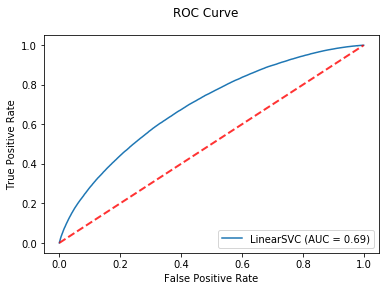

In [44]:
## example new ROC plot for SVM model using X_test.
## if you want to use selected features, pass rfecv_selected_test instead of X_test
plotNewROCCurve(svc_model.best_estimator_,  X_test, y_test)

# Part 2 Ensembles

# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

''' These are just example parameter settings. You can change these parameters or add others.
    The grid search uses a scoring method of roc_auc. You can change that to another scoring method.
'''

parameters = {'criterion' : ["gini", "entropy"],
              'n_estimators': [50]
             }

print("Parameter grid:\n{}".format(parameters),'\n')

grid =  GridSearchCV(RandomForestClassifier(), parameters, cv=10, return_train_score=True, scoring='roc_auc', n_jobs=-1)

# perform grid search cv on training data.  The CV algorithm divides this into training and validation
rf_model = grid.fit(X_train, y_train)

print('best params ',rf_model.best_params_,'\n')
print('best estimator ',rf_model.best_estimator_,'\n')
print('best validation score ', rf_model.best_score_,'\n')
print('scoring method ', rf_model.scorer_)

print("Test set accuracy score: {:.7f}".format(rf_model.score(X_test, y_test)))

#saveModel('rf_model', rf_model)

Parameter grid:
{'criterion': ['gini', 'entropy'], 'n_estimators': [50]} 

best params  {'criterion': 'entropy', 'n_estimators': 50} 

best estimator  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 

best validation score  0.6813132993919682 

scoring method  make_scorer(roc_auc_score, needs_threshold=True)
Test set accuracy score: 0.6812439


# Prediction

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, fbeta_score, classification_report

'''Function to print model accuracy information'''

def printAccuracyInfo(model, X_test, y_test):
    print(y_test.value_counts())
    # Make predictions against the test set
    pred = rf_model.predict(X_test)
    # Show the confusion matrix
    ''' confusion matrix returned with Predicted as the Columns and Actual as the Rows
         PN  PP
         AN [tn  fp] 
         AP [fn  tp]
    '''
    # Show the confusion matrix
    print("confusion matrix:")
    print(confusion_matrix(y_test, pred))
    tn,fp,fn,tp=confusion_matrix(y_test, pred).ravel()
    print('tn: ',tn)
    print('fp: ',fp)
    print('fn: ',fn)
    print('tp: ',tp)

    # Find the accuracy scores of the predictions against the true classes
    print("accuracy: %0.3f" % accuracy_score(y_test, pred))
    print("recall: %0.3f" % recall_score(y_test, pred, pos_label=True))
    print("precision: %0.3f" % precision_score(y_test, pred, pos_label=True))
    print("f-measure: %0.3f" % fbeta_score(y_test, pred, beta=1, pos_label=True))
    print(classification_report(y_test,pred))

In [12]:
# example use of printAccuracyInfo using gbc_model and X_test
# note: if you trained model using rfecv_selected_train, you need to call the function with rfecv_selected_test for X_test
printAccuracyInfo(rf_model, X_test, y_test)

False    249871
True      65207
Name: default, dtype: int64
confusion matrix:
[[245068   4803]
 [ 60151   5056]]
tn:  245068
fp:  4803
fn:  60151
tp:  5056
accuracy: 0.794
recall: 0.078
precision: 0.513
f-measure: 0.135
              precision    recall  f1-score   support

       False       0.80      0.98      0.88    249871
        True       0.51      0.08      0.13     65207

    accuracy                           0.79    315078
   macro avg       0.66      0.53      0.51    315078
weighted avg       0.74      0.79      0.73    315078



In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

'''Function to print confusion matrix for a model
   You may need to run this to update to scikit-learn version 0.22.1
         !pip install -U scikit-learn --user
'''

def plotConfusionMatrix (negative_label, positive_label, model, X_test, y_test):
    titles_options = [("Confusion matrix, without normalization", None,'d'),
                      ("Normalized confusion matrix", 'true','.3g')]
    for title, normalize,val_frmt in titles_options:
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=[negative_label,positive_label],
                                     cmap=plt.cm.Blues,
                                     values_format=val_frmt,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        disp.ax_.set_xlabel('Predicted')
        disp.ax_.set_ylabel('Actual')

        print(title)
        print(disp.confusion_matrix)

    plt.show()

Confusion matrix, without normalization
[[245068   4803]
 [ 60151   5056]]
Normalized confusion matrix
[[0.98077808 0.01922192]
 [0.92246231 0.07753769]]


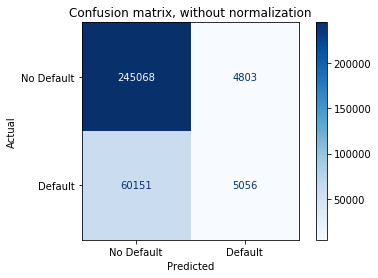

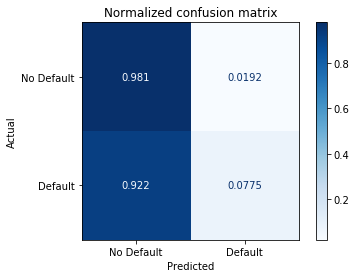

In [14]:
# example use of plotConfusionMatrix using gbc_model and X_test
# note: if you trained model using rfecv_selected_train, you need to call the function with rfecv_selected_test for X_test
plotConfusionMatrix('No Default', 'Default', rf_model, X_test, y_test)

# visualization of performance

In [15]:
def plot_roc_curve_1 (model, model_name, X_test, y_test):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from matplotlib import pyplot

    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]

    # predict probabilities
    cf_probs = model.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    cf_probs = cf_probs[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    cf_auc = roc_auc_score(y_test, cf_probs)

    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(model_name,': ROC AUC=%.3f' % (cf_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    cf_fpr, cf_tpr, _ = roc_curve(y_test, cf_probs)

    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(cf_fpr, cf_tpr, marker='.', label=model_name)

    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')

    # show the legend
    pyplot.legend()

    # show the plot
    pyplot.show()

No Skill: ROC AUC=0.500
Random Forest : ROC AUC=0.681


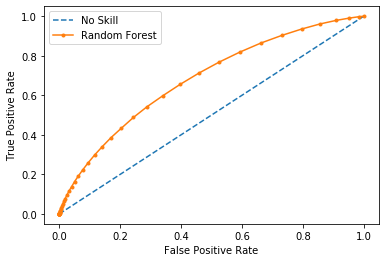

In [16]:
## example ROC plot for random forest model using X_test.
## if you want to use selected features, pass rfecv_selected_test instead of X_test
plot_roc_curve_1(rf_model, 'Random Forest', X_test, y_test)

# Questin 2

# Boosting ensemble model 

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

''' These are just example parameter settings. You can change these parameters or add others.
    The grid search uses a scoring method of roc_auc. You can change that to another scoring method.
'''

parameters = {"loss" : ["deviance", "exponential"],
              "learning_rate" :   [.05, .2],
              "n_estimators": [50,100,500]
             }

print("Parameter grid:\n{}".format(parameters),'\n')

grid =  GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, return_train_score=True, scoring='roc_auc', n_jobs=-1)

# perform grid search cv on training data.  The CV algorithm divides this into training and validation
gbc_model = grid.fit(X_train, y_train)

print('best params ',gbc_model.best_params_,'\n')
print('best estimator ',gbc_model.best_estimator_,'\n')
print('best validation score ', gbc_model.best_score_,'\n')
print('scoring method ', gbc_model.scorer_)

print("Test set accuracy score: {:.7f}".format(gbc_model.score(X_test, y_test)))


#saveModel('gbc_model', gbc_model)

Parameter grid:
{'loss': ['deviance', 'exponential'], 'learning_rate': [0.05, 0.2], 'n_estimators': [50, 100, 500]} 

best params  {'learning_rate': 0.2, 'loss': 'exponential', 'n_estimators': 500} 

best estimator  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='exponential', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 

best validation score  0.7160414832468244 

scoring method  make_scorer(roc_auc_sc

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, fbeta_score, classification_report

'''Function to print model accuracy information'''

def printAccuracyInfo(model, X_test, y_test):
    print(y_test.value_counts())
    # Make predictions against the test set
    pred = gbc_model.predict(X_test)
    # Show the confusion matrix
    ''' confusion matrix returned with Predicted as the Columns and Actual as the Rows
         PN  PP
         AN [tn  fp] 
         AP [fn  tp]
    '''
    # Show the confusion matrix
    print("confusion matrix:")
    print(confusion_matrix(y_test, pred))
    tn,fp,fn,tp=confusion_matrix(y_test, pred).ravel()
    print('tn: ',tn)
    print('fp: ',fp)
    print('fn: ',fn)
    print('tp: ',tp)

    # Find the accuracy scores of the predictions against the true classes
    print("accuracy: %0.3f" % accuracy_score(y_test, pred))
    print("recall: %0.3f" % recall_score(y_test, pred, pos_label=True))
    print("precision: %0.3f" % precision_score(y_test, pred, pos_label=True))
    print("f-measure: %0.3f" % fbeta_score(y_test, pred, beta=1, pos_label=True))
    print(classification_report(y_test,pred))

In [12]:
# example use of printAccuracyInfo using gbc_model and X_test
# note: if you trained model using rfecv_selected_train, you need to call the function with rfecv_selected_test for X_test
printAccuracyInfo(gbc_model, X_test, y_test)

False    249871
True      65207
Name: default, dtype: int64
confusion matrix:
[[245007   4864]
 [ 59061   6146]]
tn:  245007
fp:  4864
fn:  59061
tp:  6146
accuracy: 0.797
recall: 0.094
precision: 0.558
f-measure: 0.161
              precision    recall  f1-score   support

       False       0.81      0.98      0.88    249871
        True       0.56      0.09      0.16     65207

    accuracy                           0.80    315078
   macro avg       0.68      0.54      0.52    315078
weighted avg       0.75      0.80      0.73    315078



In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

'''Function to print confusion matrix for a model
   You may need to run this to update to scikit-learn version 0.22.1
         !pip install -U scikit-learn --user
'''

def plotConfusionMatrix (negative_label, positive_label, model, X_test, y_test):
    titles_options = [("Confusion matrix, without normalization", None,'d'),
                      ("Normalized confusion matrix", 'true','.3g')]
    for title, normalize,val_frmt in titles_options:
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=[negative_label,positive_label],
                                     cmap=plt.cm.Blues,
                                     values_format=val_frmt,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        disp.ax_.set_xlabel('Predicted')
        disp.ax_.set_ylabel('Actual')

        print(title)
        print(disp.confusion_matrix)

    plt.show()

Confusion matrix, without normalization
[[245007   4864]
 [ 59061   6146]]
Normalized confusion matrix
[[0.98053396 0.01946604]
 [0.90574632 0.09425368]]


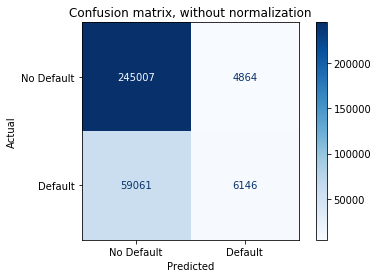

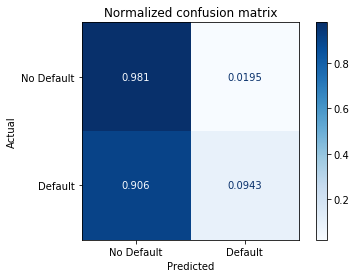

In [14]:
# example use of plotConfusionMatrix using gbc_model and X_test
# note: if you trained model using rfecv_selected_train, you need to call the function with rfecv_selected_test for X_test
plotConfusionMatrix('No Default', 'Default', gbc_model, X_test, y_test)

# visualization of performance

In [15]:
def plot_roc_curve_1 (model, model_name, X_test, y_test):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from matplotlib import pyplot

    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]

    # predict probabilities
    cf_probs = model.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    cf_probs = cf_probs[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    cf_auc = roc_auc_score(y_test, cf_probs)

    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(model_name,': ROC AUC=%.3f' % (cf_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    cf_fpr, cf_tpr, _ = roc_curve(y_test, cf_probs)

    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(cf_fpr, cf_tpr, marker='.', label=model_name)

    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')

    # show the legend
    pyplot.legend()

    # show the plot
    pyplot.show()

No Skill: ROC AUC=0.500
gbc_model : ROC AUC=0.716


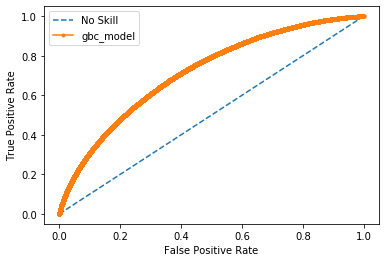

In [16]:
## example ROC plot for random forest model using X_test.
## if you want to use selected features, pass rfecv_selected_test instead of X_test
plot_roc_curve_1(gbc_model, 'gbc_model', X_test, y_test)

# 2.	Use a rank correlation to objectively compare LendingClub’s grade with the results of your top two performing models

In [17]:
from scipy.stats import spearmanr

def getCorrelation (grades, scores):
    coef, p = spearmanr(grades, scores)
    print('Spearmans correlation coefficient: %.3f' % coef)

    alpha = 0.05
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
        print('Samples are correlated (reject H0) p=%.3f' % p)